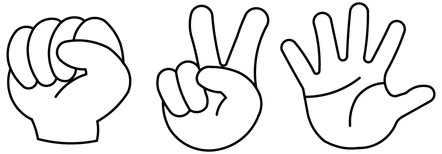

# Exploration 5. Image Classification
---
# (프로젝트) 인공지능과 가위바위보하기

## [루브릭]
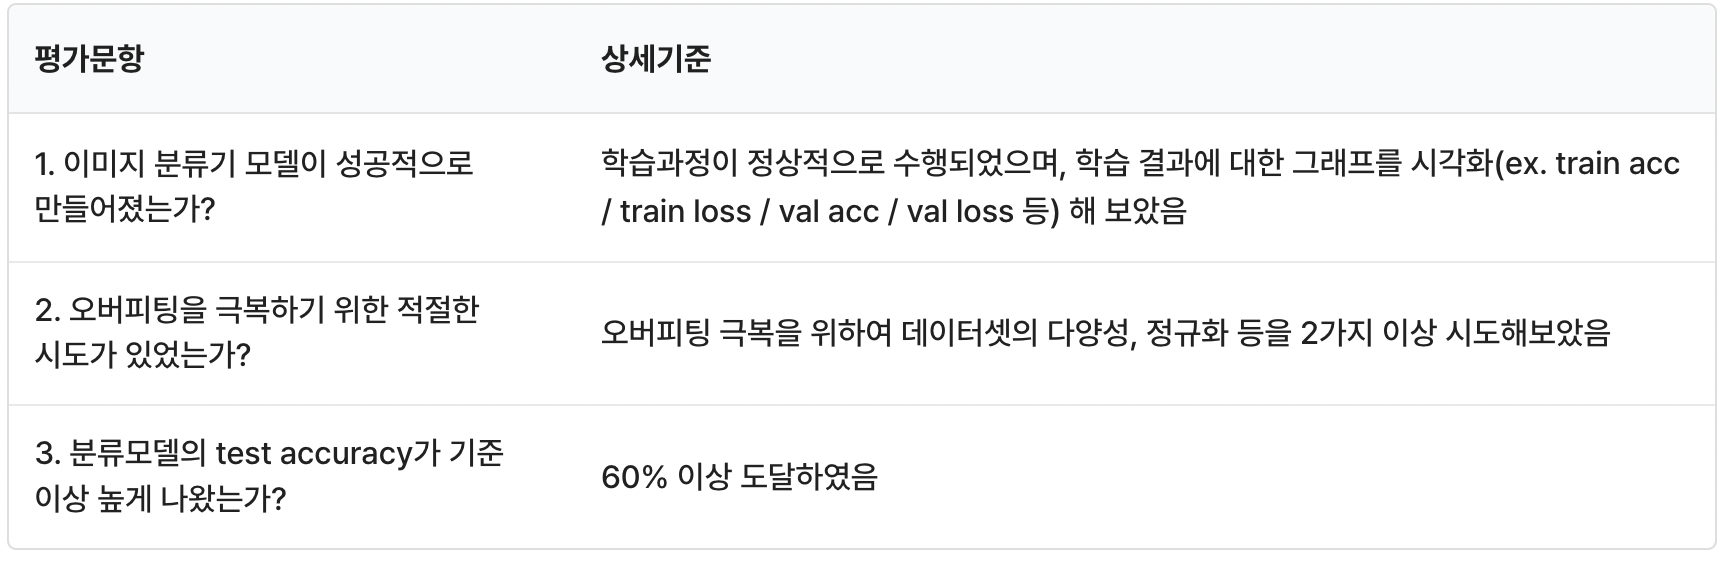

In [1]:
# 필요 라이브러리 import

import os
import glob

import tensorflow as tf
from tensorflow import keras
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

In [2]:
image_dir_path = '/Users/joowanha/PycharmProjects/AIFFEL/rock_scissors_paper'

In [3]:
# 이미지 사이즈 변환
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), " images to be resized.")
    
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images :
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,  Image.Resampling.LANCZOS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# training 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어 들여서 변환
print("가위 이미지변환")
resize_images(image_dir_path + '/scissors')

print("바위 이미지변환")
resize_images(image_dir_path+'/rock')

print("보 이미지변환")
resize_images(image_dir_path +'/paper')

가위 이미지변환
660  images to be resized.
660  images resized.
바위 이미지변환
821  images to be resized.
821  images resized.
보 이미지변환
731  images to be resized.
731  images resized.


In [4]:
# test 이미지 변환
# 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어 들여서 변환
image_dir_path_test = '/Users/joowanha/PycharmProjects/AIFFEL/rock_scissors_paper/test'

print("가위 이미지변환")
resize_images(image_dir_path_test + '/scissors')

print("바위 이미지변환")
resize_images(image_dir_path_test+'/rock')

print("보 이미지변환")
resize_images(image_dir_path_test +'/paper')

가위 이미지변환
100  images to be resized.
100  images resized.
바위 이미지변환
100  images to be resized.
100  images resized.
보 이미지변환
100  images to be resized.
100  images resized.


In [5]:
# 이미지 이름 변경
def image_name_change(img_path, prefix):
    images=glob.glob(img_path + "/*.jpg")
    
    file_names = os.listdir(img_path)

    for name in file_names:
        src = os.path.join(img_path, name)
        dst = os.path.join(img_path, prefix+name)
        os.rename(src, dst)

In [6]:
# # 1회성 사용
# image_name_change(image_dir_path + '/scissors', "hjw")
# image_name_change(image_dir_path + '/paper', "hjw")
# image_name_change(image_dir_path + '/rock', "hjw")

# image_name_change(image_dir_path + '/김정대/scissor', "kjd")
# image_name_change(image_dir_path + '/김정대/paper', "kjd")
# image_name_change(image_dir_path + '/김정대/rock', "kjd")

# image_name_change(image_dir_path + '/박광석/scissor', "pks")
# image_name_change(image_dir_path + '/박광석/paper', "pks")
# image_name_change(image_dir_path + '/박광석/rock', "pks")

# image_name_change(image_dir_path + '/김경덕/scissor', "kkd")
# image_name_change(image_dir_path + '/김경덕/paper', "kkd")
# image_name_change(image_dir_path + '/김경덕/rock', "kkd")

# image_name_change(image_dir_path + '/강병채/scissor', "kbc")
# image_name_change(image_dir_path + '/강병채/paper', "kbc")
# image_name_change(image_dir_path + '/강병채/rock', "kbc")

# image_name_change(image_dir_path + '/손정기/scissor', "sjk")
# image_name_change(image_dir_path + '/손정기/paper', "sjk")
# image_name_change(image_dir_path + '/손정기/rock', "sjk")

# image_name_change(image_dir_path + '/임종인/scissor', "lji")
# image_name_change(image_dir_path + '/임종인/paper', "lji")
# image_name_change(image_dir_path + '/임종인/rock', "lji")

# image_name_change(image_dir_path + '/정효원/scissor', "jhw")
# image_name_change(image_dir_path + '/정효원/paper', "jhw")
# image_name_change(image_dir_path + '/정효원/rock', "jhw")

# image_name_change(image_dir_path + '/조상준/scissors', "jsj")
# image_name_change(image_dir_path + '/조상준/paper', "jsj")
# image_name_change(image_dir_path + '/조상준/rock', "jsj")

# image_name_change(image_dir_path + '/최현/scissor', "ch")
# image_name_change(image_dir_path + '/최현/paper', "ch")
# image_name_change(image_dir_path + '/최현/rock', "ch")

In [7]:
# 파일 폴더 이동
import shutil

def read_all_file(path):
    output = os.listdir(path)
    file_list = []

    for i in output:
        if os.path.isdir(path+"/"+i): 
            file_list.extend(read_all_file(path+"/"+i)) 
        elif os.path.isfile(path+"/"+i):
            file_list.append(path+"/"+i)

    return file_list


def copy_all_file(file_list, new_path):
    for src_path in file_list:
        file = src_path.split("/")[-1]
        shutil.copyfile(src_path, new_path+"/"+file)

In [8]:
# 1회성 사용
# file_list = read_all_file(image_dir_path+'/김정대/scissor')
# copy_all_file(file_list, image_dir_path+'/scissors')

# file_list = read_all_file(image_dir_path+'/김정대/rock')
# copy_all_file(file_list, image_dir_path+'/rock')

# file_list = read_all_file(image_dir_path+'/김정대/paper')
# copy_all_file(file_list, image_dir_path+'/paper')

# file_list = read_all_file(image_dir_path+'/박광석/scissor')
# copy_all_file(file_list, image_dir_path+'/scissors')

# file_list = read_all_file(image_dir_path+'/박광석/paper')
# copy_all_file(file_list, image_dir_path+'/paper')

# file_list = read_all_file(image_dir_path+'/박광석/rock')
# copy_all_file(file_list, image_dir_path+'/rock')

# file_list = read_all_file(image_dir_path+'/김경덕/scissor')
# copy_all_file(file_list, image_dir_path+'/scissors')

# file_list = read_all_file(image_dir_path+'/김경덕/paper')
# copy_all_file(file_list, image_dir_path+'/paper')

# file_list = read_all_file(image_dir_path+'/김경덕/rock')
# copy_all_file(file_list, image_dir_path+'/rock')

# file_list = read_all_file(image_dir_path+'/강병채/scissor')
# copy_all_file(file_list, image_dir_path+'/scissors')

# file_list = read_all_file(image_dir_path+'/강병채/paper')
# copy_all_file(file_list, image_dir_path+'/paper')

# file_list = read_all_file(image_dir_path+'/강병채/rock')
# copy_all_file(file_list, image_dir_path+'/rock')

# file_list = read_all_file(image_dir_path+'/손정기/scissor')
# copy_all_file(file_list, image_dir_path+'/scissors')

# file_list = read_all_file(image_dir_path+'/손정기/paper')
# copy_all_file(file_list, image_dir_path+'/paper')

# file_list = read_all_file(image_dir_path+'/손정기/rock')
# copy_all_file(file_list, image_dir_path+'/rock')

# file_list = read_all_file(image_dir_path+'/정효원/scissor')
# copy_all_file(file_list, image_dir_path+'/scissors')

# file_list = read_all_file(image_dir_path+'/정효원/paper')
# copy_all_file(file_list, image_dir_path+'/paper')

# file_list = read_all_file(image_dir_path+'/정효원/rock')
# copy_all_file(file_list, image_dir_path+'/rock')

# file_list = read_all_file(image_dir_path+'/임종인/scissor')
# copy_all_file(file_list, image_dir_path+'/scissors')

# file_list = read_all_file(image_dir_path+'/임종인/paper')
# copy_all_file(file_list, image_dir_path+'/paper')

# file_list = read_all_file(image_dir_path+'/임종인/rock')
# copy_all_file(file_list, image_dir_path+'/rock')

# file_list = read_all_file(image_dir_path+'/조상준/scissor')
# copy_all_file(file_list, image_dir_path+'/scissors')

# file_list = read_all_file(image_dir_path+'/조상준/paper')
# copy_all_file(file_list, image_dir_path+'/paper')

# file_list = read_all_file(image_dir_path+'/조상준/rock')
# copy_all_file(file_list, image_dir_path+'/rock')

# file_list = read_all_file(image_dir_path+'/최현/scissor')
# copy_all_file(file_list, image_dir_path+'/scissors')

# file_list = read_all_file(image_dir_path+'/최현/paper')
# copy_all_file(file_list, image_dir_path+'/paper')

# file_list = read_all_file(image_dir_path+'/최현/rock')
# copy_all_file(file_list, image_dir_path+'/rock')

In [9]:
# load_data 함수
def load_data(img_path, number_of_data = 2212):
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size = 28
    color =3
    # number_of_data=len(glob.glob(img_path + "/*/*.jpg"))
    print(number_of_data)
    # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    # imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    imgs = np.zeros((number_of_data, img_size, img_size, color), dtype=np.int32)
    labels = np.zeros(number_of_data, dtype = np.int32)
    
    idx = 0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, : ] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0 # 가위
        idx = idx +1
        
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, : ] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1 # 바위
        idx = idx +1           
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, : ] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2 # 보
        idx = idx +1   
        
    print("데이터의 이미지 개수는 ", idx, "입니다.")
    return imgs, labels

In [10]:
x_train, y_train = load_data(image_dir_path)

2212
데이터의 이미지 개수는  2212 입니다.


In [11]:
x_train.shape

(2212, 28, 28, 3)

In [12]:
x_test, y_test = load_data(image_dir_path+'/test')

2212
데이터의 이미지 개수는  300 입니다.


In [13]:
type(x_train)

numpy.ndarray

In [14]:
x_train.max(), x_train.min()

(255, 0)

In [15]:
x_train_norm = x_train/255 # 0~1 사이의 값으로 정규화
x_test_norm = x_test/255

In [16]:
print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape)) 

x_train shape: (2212, 28, 28, 3)
y_train shape: (2212,)


라벨:  0


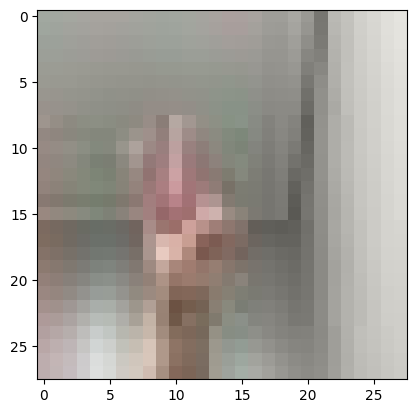

In [17]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 딥러닝 네트워크 설계하기

### [1차] 기본 baseline 적용

In [18]:
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")


After Reshape - x_train_reshaped shape: (2212, 28, 28, 3)
After Reshape - x_test_reshaped shape: (2212, 28, 28, 3)


In [19]:
n_channel_1 = 16
n_channel_2 = 32
epochs_num = 10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()


Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (No

2022-11-22 23:57:29.865123: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# model.fit(x_train_reshaped, y_train, epochs=10)
history = model.fit(x_train_reshaped, y_train, epochs=epochs_num, validation_data=(x_test_reshaped, y_test))


test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자.
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

Epoch 1/10
70/70 [==============================] - 1s 6ms/step - loss: 0.9818 - accuracy: 0.5050 - val_loss: 1.0816 - val_accuracy: 0.0457
Epoch 2/10
70/70 [==============================] - 0s 5ms/step - loss: 0.7125 - accuracy: 0.6985 - val_loss: 1.1456 - val_accuracy: 0.0172
Epoch 3/10
70/70 [==============================] - 0s 5ms/step - loss: 0.4964 - accuracy: 0.8047 - val_loss: 1.2032 - val_accuracy: 0.0249
Epoch 4/10
70/70 [==============================] - 0s 5ms/step - loss: 0.3884 - accuracy: 0.8504 - val_loss: 1.3122 - val_accuracy: 0.0258
Epoch 5/10
70/70 [==============================] - 0s 5ms/step - loss: 0.2767 - accuracy: 0.9060 - val_loss: 1.4543 - val_accuracy: 0.0271
Epoch 6/10
70/70 [==============================] - 0s 5ms/step - loss: 0.2057 - accuracy: 0.9358 - val_loss: 1.6269 - val_accuracy: 0.0253
Epoch 7/10
70/70 [==============================] - 0s 5ms/step - loss: 0.1679 - accuracy: 0.9498 - val_loss: 1.9360 - val_accuracy: 0.0271
Epoch 8/10
70/70 [==

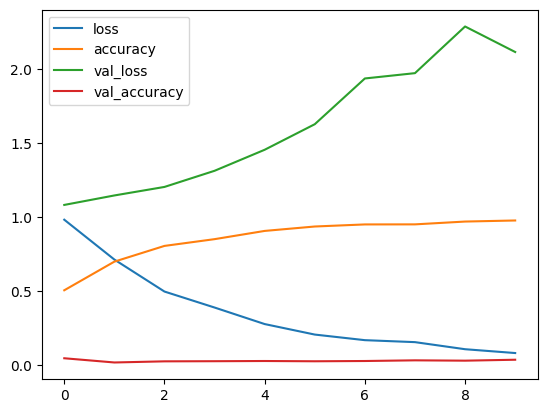

In [21]:
plt.figure()

for k,v in history.history.items():
    plt.plot(history.history[k], label=k)
plt.legend()
plt.show()

### [2차] (참고 자료를 참고하여) 13개 layer 적용

In [22]:
n_channel_1 = 128
n_channel_2 = 128
n_dense=128
epochs_num = 20

print("테스트 개수 : ", len(x_train))

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

print('Model에 추가된 Layer 개수: ', len(model.layers))

history = model.fit(x_train_reshaped, y_train, epochs=epochs_num, validation_data=(x_test_reshaped, y_test))

test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

테스트 개수 :  2212
Model에 추가된 Layer 개수:  13
Epoch 1/20
70/70 [==============================] - 3s 41ms/step - loss: 1.0952 - accuracy: 0.3662 - val_loss: 1.1287 - val_accuracy: 0.0212
Epoch 2/20
70/70 [==============================] - 3s 40ms/step - loss: 0.9811 - accuracy: 0.4607 - val_loss: 1.2455 - val_accuracy: 0.0199
Epoch 3/20
70/70 [==============================] - 3s 40ms/step - loss: 0.7916 - accuracy: 0.6270 - val_loss: 0.5470 - val_accuracy: 0.8802
Epoch 4/20
70/70 [==============================] - 3s 39ms/step - loss: 0.5799 - accuracy: 0.7405 - val_loss: 0.4516 - val_accuracy: 0.8892
Epoch 5/20
70/70 [==============================] - 3s 38ms/step - loss: 0.4726 - accuracy: 0.8074 - val_loss: 0.7700 - val_accuracy: 0.8698
Epoch 6/20
70/70 [==============================] - 3s 39ms/step - loss: 0.3455 - accuracy: 0.8657 - val_loss: 1.2520 - val_accuracy: 0.8703
Epoch 7/20
70/70 [==============================] - 3s 39ms/step - loss: 0.2907 - accuracy: 0.8901 - val_loss: 0.8

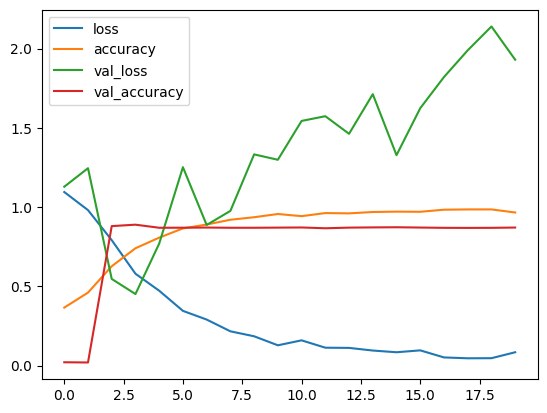

In [23]:
plt.figure()

for k,v in history.history.items():
    plt.plot(history.history[k], label=k)
plt.legend()
plt.show()

### [3차] 15 layer 및 데이터 증강(rotation/flip) 적용

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [30]:
n_channel_1 = 128
n_channel_2 = 128
n_dense=128
epochs_num = 20

print("테스트 개수 : ", len(x_train))

model = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(factor = (-0.2,0.3)),
    tf.keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

print('Model에 추가된 Layer 개수: ', len(model.layers))

history = model.fit(x_train_reshaped, y_train, epochs=epochs_num, validation_data=(x_test_reshaped, y_test))

test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

테스트 개수 :  2212
Model에 추가된 Layer 개수:  15
Epoch 1/20
70/70 [==============================] - 4s 44ms/step - loss: 1.1004 - accuracy: 0.3599 - val_loss: 1.1141 - val_accuracy: 0.0452
Epoch 2/20
70/70 [==============================] - 3s 43ms/step - loss: 1.0830 - accuracy: 0.3761 - val_loss: 1.2866 - val_accuracy: 0.0312
Epoch 3/20
70/70 [==============================] - 3s 41ms/step - loss: 0.9767 - accuracy: 0.4720 - val_loss: 0.9718 - val_accuracy: 0.0348
Epoch 4/20
70/70 [==============================] - 3s 41ms/step - loss: 0.9365 - accuracy: 0.5136 - val_loss: 0.6455 - val_accuracy: 0.9091
Epoch 5/20
70/70 [==============================] - 3s 41ms/step - loss: 0.8786 - accuracy: 0.5561 - val_loss: 0.6926 - val_accuracy: 0.9118
Epoch 6/20
70/70 [==============================] - 3s 41ms/step - loss: 0.8608 - accuracy: 0.5750 - val_loss: 0.4954 - val_accuracy: 0.9096
Epoch 7/20
70/70 [==============================] - 3s 41ms/step - loss: 0.8019 - accuracy: 0.6212 - val_loss: 0.4

## 오예측 결과 확인

In [31]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

70/70 - 1s - loss: 0.8768 - accuracy: 0.9105 - 710ms/epoch - 10ms/step
test_loss: 0.8767929673194885
test_accuracy: 0.9104882478713989


In [32]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

70/70 [==============================] - 1s 10ms/step
model.predict() 결과 :  [9.9823111e-01 1.7656418e-03 3.2216622e-06]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


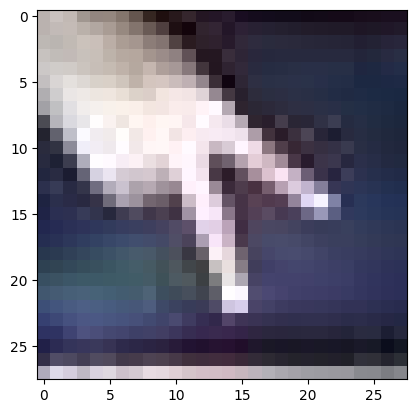

In [33]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [9.9955851e-01 4.2540929e-04 1.6119182e-05]
라벨: 2, 예측결과: 0


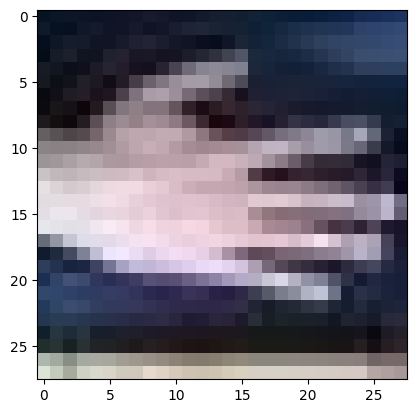

예측확률분포: [9.9930036e-01 5.3691614e-04 1.6275159e-04]
라벨: 2, 예측결과: 0


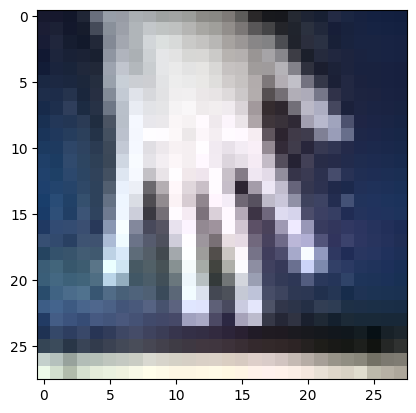

예측확률분포: [0.98376346 0.00313878 0.01309771]
라벨: 1, 예측결과: 0


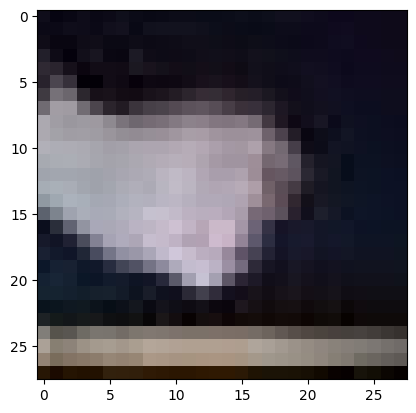

예측확률분포: [9.9928856e-01 6.1602553e-04 9.5437739e-05]
라벨: 2, 예측결과: 0


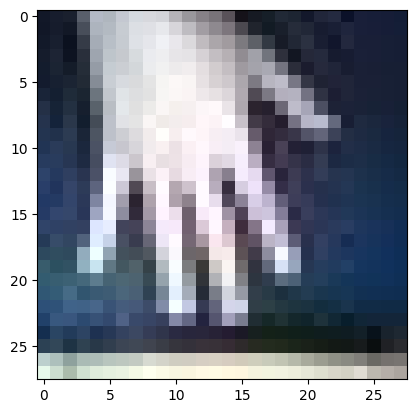

예측확률분포: [0.9874227  0.00405321 0.00852405]
라벨: 1, 예측결과: 0


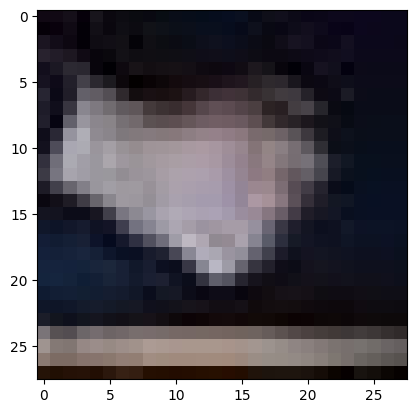

In [34]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 회고  
 - 2차의 경우 모델 레이어에 대한 이해가 부족하여 일단 타 자료에 나와있는 모델 레이어를 참고하여 적용했으며, 레이어를 늘렸을 때 정확도가 늘어난 것을 확인할 수 있었습니다. (해당 모델에 대한 스터디는 별도수행 필요)  
 - 3차의 경우 데이터 증강을 통해 2차 모델에 추가 적용해 본 결과 추가적인 정확도를 높일 수 있었습니다. 본 분류에 적합한 이미지 증강 방법에 대해 추가적인 스터디가 필요할 것 같습니다.

### 참고  
 - Model Layer : https://medium.com/geekculture/rock-paper-scissors-image-classification-using-cnn-eefe4569b415
 - Data Augmentation : https://www.tensorflow.org/guide/keras/preprocessing_layers